## Task 1.

On March 11, 2020, the World Health Organization (WHO) declared COVID-19, the disease caused by the SARS-CoV-2, a pandemic. Two days later, the Trump Administration declares a nationwide emergency and issues an additional travel ban on non-U.S. citizens traveling from 26 European countries due to COVID-19. 

The two provided csv files described the human mobility pattern of MA residents right before and after the outbreak of the COVID-19 pandemic in the US. Read them into pandas and calculate at least three metrics that we can use to understand the change in people’s mobility patterns due to COVID. 

In [1]:
import pandas as pd
import os
os.chdir(r"C:\Users\[editted]\Documents\Me\BC\Advance\Data\jupyter\exercise11\MA_cbg_human_mobility_2020")
feb_mobility = pd.read_csv("MA_cbg2cbg_2020_02.csv")
april_mobility = pd.read_csv("MA_cbg2cbg_2020_04.csv")

In [2]:
feb_mobility.head()

,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250056551003,2020_2,1400,250056551003,95
1,250056551003,2020_2,1400,250056551002,65
2,250056551003,2020_2,1400,250056554001,40
3,250056551003,2020_2,1400,250056516002,38
4,250056551003,2020_2,1400,250056551001,38


In [3]:
feb_mobility.describe()

,poi_cbg,raw_device_counts,visitor_census_tract,visitor_count
count,9.394390e+05,939439.000000,9.394390e+05,939439.000000
mean,2.501819e+11,5009.715380,2.598710e+11,6.931361
std,7.318529e+07,9815.890268,6.696892e+10,15.866447
min,2.500101e+11,6.000000,1.001021e+10,4.000000
25%,2.501381e+11,1108.000000,2.500926e+11,4.000000
50%,2.501737e+11,2264.000000,2.501738e+11,4.000000
75%,2.502503e+11,4904.000000,2.502514e+11,5.000000
max,2.502776e+11,81673.000000,7.803096e+11,3409.000000


In [4]:
april_mobility.describe()

,poi_cbg,raw_device_counts,visitor_census_tract,visitor_count
count,3.848260e+05,384826.000000,3.848260e+05,384826.000000
mean,2.501736e+11,1427.370861,2.570546e+11,7.260037
std,7.666199e+07,2259.596925,4.954369e+10,21.556619
min,2.500101e+11,8.000000,1.001021e+10,4.000000
25%,2.500927e+11,465.000000,2.500926e+11,4.000000
50%,2.501735e+11,806.000000,2.501737e+11,4.000000
75%,2.502355e+11,1611.000000,2.502509e+11,5.000000
max,2.502776e+11,23965.000000,7.215375e+11,4956.000000


In [5]:
#much fewer visitors, interesting that the max is larger though
#much fewer raw_device_count, which is curious since it claims thats the total number of devices in the origin census block.
april_group = april_mobility.groupby('poi_cbg').agg({'raw_device_counts':'min', 'visitor_count':'sum'})

In [6]:
april_group

,raw_device_counts,visitor_count
poi_cbg,,
250010101001,450,386
250010101002,159,142
250010101003,144,113
250010101004,368,291
250010101005,238,177
...,...,...
250277614002,290,222
250277614003,371,295
250277614004,267,216


In [7]:
#ah okay, so its a number very close to the visitor count sum, not necessarily the total num of devices

In [8]:
#wonder if there's any case where the "raw" is less than the sum of the visitor count
april_group.query('raw_device_counts < visitor_count')

,raw_device_counts,visitor_count
poi_cbg,,
250010105002,351,356
250010122004,299,319
250039008005,133,139
250039223001,287,291
250056171015,19,20
250056532034,291,297
250092021025,158,163
250092172023,113,115
250092175001,187,196


In [9]:
#okay so there are, but rare. doesn't indicate bad data, since one device can visit multiple places

In [10]:
#however I do need to make sure that no single location has more visitors than raw
print(feb_mobility.query('raw_device_counts < visitor_count'),
      april_mobility.query('raw_device_counts < visitor_count'))

Empty DataFrame
Columns: [poi_cbg, year_month, raw_device_counts, visitor_census_tract, visitor_count]
Index: [] Empty DataFrame
Columns: [poi_cbg, year_month, raw_device_counts, visitor_census_tract, visitor_count]
Index: []


In [11]:
#okay, so the data is good then
feb_mobility['visitor_count'].sum() / april_mobility['visitor_count'].sum() - 1

1.3306865684676814

133% decrease in visitors

I'm curious about the difference in individual communities

In [12]:
#calculating intersection, introduces some bias bc discards data that only exists on one
intersect_mobility = pd.merge(feb_mobility, april_mobility, on=['poi_cbg', 'visitor_census_tract'], suffixes=('_feb', '_april'), how='inner')

In [13]:
intersect_mobility.head()

,poi_cbg,year_month_feb,raw_device_counts_feb,visitor_census_tract,visitor_count_feb,year_month_april,raw_device_counts_april,visitor_count_april
0,250056551003,2020_2,1400,250056551003,95,2020_4,937,48
1,250056551003,2020_2,1400,250056551002,65,2020_4,937,52
2,250056551003,2020_2,1400,250056554001,40,2020_4,937,21
3,250056551003,2020_2,1400,250056516002,38,2020_4,937,15
4,250056551003,2020_2,1400,250056551001,38,2020_4,937,28


In [14]:
intersect_mobility['visitor_diff'] = intersect_mobility['visitor_count_april'] - intersect_mobility['visitor_count_feb']

In [15]:
intersect_mobility.describe()

,poi_cbg,raw_device_counts_feb,visitor_census_tract,visitor_count_feb,raw_device_counts_april,visitor_count_april,visitor_diff
count,2.128520e+05,212852.000000,2.128520e+05,212852.000000,212852.000000,212852.000000,212852.000000
mean,2.501708e+11,3915.145481,2.537013e+11,14.944896,1491.143705,9.765795,-5.179101
std,7.805093e+07,6280.266004,3.136903e+10,31.474730,2040.104200,28.732581,15.975229
min,2.500101e+11,33.000000,1.001021e+10,4.000000,17.000000,4.000000,-946.000000
25%,2.500925e+11,1088.000000,2.500925e+11,4.000000,515.000000,4.000000,-7.000000
50%,2.501734e+11,2122.000000,2.501735e+11,7.000000,907.000000,4.000000,-2.000000
75%,2.502354e+11,4407.000000,2.502505e+11,15.000000,1793.000000,7.000000,0.000000
max,2.502776e+11,81673.000000,5.514101e+11,3409.000000,23965.000000,4956.000000,1623.000000


In [16]:
intersect_mobility.nlargest(len(intersect_mobility)//10, 'visitor_count_feb').describe()

,poi_cbg,raw_device_counts_feb,visitor_census_tract,visitor_count_feb,raw_device_counts_april,visitor_count_april,visitor_diff
count,2.128500e+04,21285.000000,2.128500e+04,21285.000000,21285.000000,21285.000000,21285.000000
mean,2.501675e+11,4649.317219,2.519077e+11,71.115433,1716.607188,46.383791,-24.731642
std,7.854157e+07,6229.593480,2.097857e+10,77.904352,1994.542257,81.518569,43.563572
min,2.500101e+11,127.000000,1.117030e+10,29.000000,27.000000,4.000000,-946.000000
25%,2.500925e+11,1419.000000,2.500925e+11,36.000000,606.000000,15.000000,-30.000000
50%,2.501734e+11,2891.000000,2.501734e+11,47.000000,1140.000000,25.000000,-21.000000
75%,2.502352e+11,5807.000000,2.502353e+11,75.000000,2248.000000,49.000000,-13.000000
max,2.502776e+11,81673.000000,5.514101e+11,3409.000000,23965.000000,4956.000000,1623.000000


In [17]:
#the top 10% of visited areas had much more of a dropoff, 75% percentile is -13 vs it being 0

In [18]:
intersect_mobility.nlargest(len(intersect_mobility)//10, 'visitor_count_feb')['visitor_count_april'].sum() / intersect_mobility.nlargest(len(intersect_mobility)//10, 'visitor_count_feb')['visitor_count_feb'].sum()

0.6522324224478956

In [19]:
intersect_mobility['visitor_count_april'].sum() / intersect_mobility['visitor_count_feb'].sum()

0.6534535284093214

In [20]:
#surprisingly both groups decreased by about the same % though

In [21]:
feb_mobility.dtypes

poi_cbg                  int64
year_month              object
raw_device_counts        int64
visitor_census_tract     int64
visitor_count            int64
dtype: object

## calculated metrics
There was a 133% decrease in visitors between February and April 2020

The mean change in visitors (when there were visitors in both months) was -5.2 people

The top 10% of visited areas had about the same percent change in visitors

## Task 2.

Use these two data sources to create two human mobility networks as directed graphs for MA with          

    network node: individual census block group (neighborhood) in MA
    network edge: residents from one neighborhood visiting another with the direction of the edge implying the direction of the visit 
    weight of network tie: percentage of residents from one neighborhood (origin) visiting another (destination)

Calculate at least three network-based metrics that we can use to understand the change in people’s mobility due to COVID.

Well, raw_device_count is clearly not the number of residents in a neighborhood, since that number decreased to 1/3 in April. Lets get the acs_data, and see if it makes sense to use that actual pop number

In [22]:
os.chdir(r'C:\Users\[editted]\Documents\Me\BC\Advance\Data\jupyter\exercise11')
acs_data = pd.read_csv("acs_data_for_MA.csv")

In [23]:
acs_data

,census_block_group,total_population,black_population,white_population,asian_population,hispanic_population,median_income
0,250010101001,938,0,770,10,41,51837.0
1,250010101002,289,12,237,0,0,48250.0
2,250010101003,755,29,694,0,0,53750.0
3,250010101004,499,9,438,0,0,28182.0
4,250010101005,481,38,378,0,0,34091.0
...,...,...,...,...,...,...,...
4980,250277614002,1143,0,1068,0,0,124219.0
4981,250277614003,783,0,709,0,0,167375.0
4982,250277614004,845,0,845,0,0,127679.0
4983,250277614005,1126,108,939,8,0,136806.0


In [24]:
acs_data.isna().sum()

census_block_group       0
total_population         0
black_population         0
white_population         0
asian_population         0
hispanic_population      0
median_income          188
dtype: int64

In [25]:
feb_mobility_info = pd.merge(acs_data, feb_mobility, left_on='census_block_group', right_on='poi_cbg', how='right')

In [26]:
feb_mobility_info.head()

,census_block_group,total_population,black_population,white_population,asian_population,hispanic_population,median_income,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
0,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056551003,95
1,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056551002,65
2,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056554001,40
3,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056516002,38
4,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056551001,38


In [27]:
#curious how the total_pop is not a sum of the individual racial categories, but thats something to think about later
feb_mobility_info.isna().sum()

census_block_group          0
total_population            0
black_population            0
white_population            0
asian_population            0
hispanic_population         0
median_income           41854
poi_cbg                     0
year_month                  0
raw_device_counts           0
visitor_census_tract        0
visitor_count               0
dtype: int64

In [28]:
#well, seems like every one has a total_pop, which is nice
feb_mobility_info['total_population'].describe()

count    939439.000000
mean       1497.482972
std         756.346815
min           0.000000
25%         962.000000
50%        1342.000000
75%        1935.000000
max        6816.000000
Name: total_population, dtype: float64

In [29]:
#the 0 pop is concerning
feb_mobility_info.query('total_population == 0')

,census_block_group,total_population,black_population,white_population,asian_population,hispanic_population,median_income,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count
1697,250259816001,0,0,0,0,0,NaN,250259816001,2020_2,461,250251801013,25
1698,250259816001,0,0,0,0,0,NaN,250259816001,2020_2,461,250251802004,20
1699,250259816001,0,0,0,0,0,NaN,250259816001,2020_2,461,250250511013,19
1700,250259816001,0,0,0,0,0,NaN,250259816001,2020_2,461,250250511014,13
1701,250259816001,0,0,0,0,0,NaN,250259816001,2020_2,461,250251802001,12
...,...,...,...,...,...,...,...,...,...,...,...,...
894618,250259813001,0,0,0,0,0,NaN,250259813001,2020_2,562,60014029001,4
894619,250259813001,0,0,0,0,0,NaN,250259813001,2020_2,562,130890234182,4
894620,250259813001,0,0,0,0,0,NaN,250259813001,2020_2,562,420454103014,4
894621,250259813001,0,0,0,0,0,NaN,250259813001,2020_2,562,340270441012,4


In [30]:
len(feb_mobility_info.query('total_population == 0'))/len(feb_mobility_info)

0.0032955838537680466

In [31]:
#0.3%, don't want to drop the data but could probably estimate pop from device count
feb_mobility_info['raw_device_counts'].describe()

count    939439.000000
mean       5009.715380
std        9815.890268
min           6.000000
25%        1108.000000
50%        2264.000000
75%        4904.000000
max       81673.000000
Name: raw_device_counts, dtype: float64

In [32]:
feb_mobility_info['total_population'].describe()

count    939439.000000
mean       1497.482972
std         756.346815
min           0.000000
25%         962.000000
50%        1342.000000
75%        1935.000000
max        6816.000000
Name: total_population, dtype: float64

In [33]:
#higher standard deviation in raw_device counts (even after adjusting for the higher numbers)
#I still feel okay overall estimating population this way, or rather its the best option I have
device_pop_ratio = feb_mobility_info['raw_device_counts'].quantile(q=0.5)/feb_mobility_info['total_population'].quantile(q=0.5)

In [34]:
feb_mobility_info.loc[feb_mobility_info['total_population'] == 0, 'total_population'] = device_pop_ratio * feb_mobility_info.query('total_population == 0')['raw_device_counts']

In [35]:
#now to double check that worked
feb_mobility_info.query('total_population == 0')

,census_block_group,total_population,black_population,white_population,asian_population,hispanic_population,median_income,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count


In [36]:
#cool, now we can actually calculate out the percent visiting, and start on the network analysis
feb_mobility_info['percent_visiting'] = feb_mobility_info['visitor_count']/feb_mobility_info['total_population']

In [37]:
feb_mobility_info['percent_visiting'].describe()

count    939439.000000
mean          0.006350
std           0.025786
min           0.000232
25%           0.002317
50%           0.003442
75%           0.005391
max           5.500000
Name: percent_visiting, dtype: float64

In [38]:
#well, that 5.5 is concerning
feb_mobility_info.query('percent_visiting > 1')

,census_block_group,total_population,black_population,white_population,asian_population,hispanic_population,median_income,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count,percent_visiting
273083,250039001001,746.0,83,630,0,0,21824.0,250039001001,2020_2,7165,250039001002,779,1.044236
316565,250056516002,1025.0,61,443,20,42,33409.0,250056516002,2020_2,15973,250056516002,1390,1.356098
453428,250138011011,1963.0,281,996,5,0,12628.0,250138011011,2020_2,33576,250138011011,3409,1.736628
472122,250173631044,373.0,0,373,0,0,144911.0,250173631044,2020_2,6100,250173631044,517,1.386059
696191,250259815021,12.0,12,0,0,0,NaN,250259815021,2020_2,4473,250251705011,66,5.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759069,250259818001,53.0,0,53,0,0,197500.0,250259818001,2020_2,9225,250251706011,55,1.037736
824420,250250911003,841.0,40,345,0,36,54476.0,250250911003,2020_2,42987,90035106001,1435,1.706302
824421,250250911003,841.0,40,345,0,36,54476.0,250250911003,2020_2,42987,250250911003,999,1.187872
870084,250056315002,1056.0,0,1026,0,0,66014.0,250056315002,2020_2,15424,250056315002,1567,1.483902


One block had 12 actual people, but 4473 raw devices. how good of a metric is the device count then?



In [39]:
#first lets group by block, so we can get accurate percentages
feb_info_group = feb_mobility_info.groupby('poi_cbg').agg({'raw_device_counts':'min', 'total_population':'min'})

In [40]:
feb_info_group.head()

,raw_device_counts,total_population
poi_cbg,,
250010101001,844,938.0
250010101002,277,289.0
250010101003,260,755.0
250010101004,1859,499.0
250010101005,673,481.0


(array([3184., 1042.,  338.,  157.,   85.,   61.,   26.,   16.,    9.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

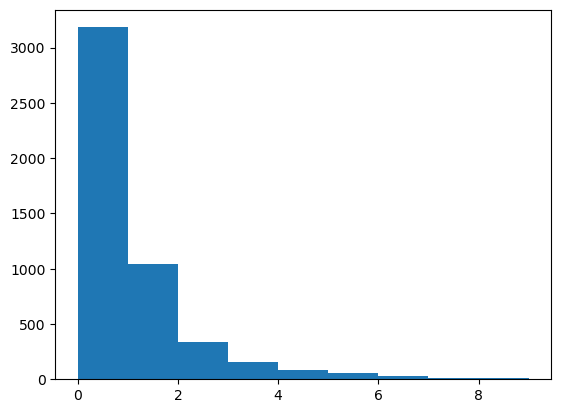

In [41]:
import matplotlib.pyplot as plt
plt.hist(feb_info_group['raw_device_counts']/feb_info_group['total_population'], bins=range(0, 10))

In [42]:
(feb_info_group['raw_device_counts']/feb_info_group['total_population'] > 10).sum()/len(feb_info_group)

0.010834670947030497

In [43]:
(feb_info_group['raw_device_counts']/feb_info_group['total_population'] > 20).sum()/len(feb_info_group)

0.003009630818619583

1% of blocks have more than 10 devices per person, and 0.3% have more than 20 devices per person. Still a bit concerning, but somewhat reasonable.

Overall, it seems like it makes more sense to just go ahead and use raw_device_count, since both that and visitor_count are measuring using the same method (devices), and we avoid having more than 100% of people visit. This is despite the problems with making conclusions on that data shown by the large decrease in raw_device_count and the mismatch between population and raw_device_count.

In [44]:
feb_mobility['percent_visiting'] = feb_mobility['visitor_count']/feb_mobility['raw_device_counts']

In [45]:
feb_mobility['percent_visiting'].describe()

count    939439.000000
mean          0.004406
std           0.011523
min           0.000049
25%           0.000986
50%           0.002240
75%           0.004648
max           0.666667
Name: percent_visiting, dtype: float64

In [46]:
april_mobility['percent_visiting'] = april_mobility['visitor_count']/april_mobility['raw_device_counts']

In [47]:
april_mobility['percent_visiting'].describe()

count    384826.000000
mean          0.010980
std           0.027343
min           0.000167
25%           0.003046
50%           0.005995
75%           0.010730
max           0.551037
Name: percent_visiting, dtype: float64

In [48]:
import networkx as nx
feb_graph = nx.from_pandas_edgelist(feb_mobility, source='poi_cbg', target='visitor_census_tract', edge_attr='percent_visiting', create_using=nx.DiGraph)
april_graph = nx.from_pandas_edgelist(april_mobility, source='poi_cbg', target='visitor_census_tract', edge_attr='percent_visiting', create_using=nx.DiGraph)

In [49]:
print('feb len:', len(feb_graph))
print('april len:', len(april_graph))
print('april/feb len:', len(april_graph)/len(feb_graph))

feb len: 46319
april len: 17104
april/feb len: 0.3692653122908526


In [50]:
print('feb:', nx.density(feb_graph))
print('april:', nx.density(april_graph))
print('april/feb', nx.density(april_graph)/nx.density(feb_graph))

feb: 0.0004378845403194799
april: 0.0013155108155304238
april/feb 3.0042412882871568


In [51]:
#very very low density, though it increases in April
len(nx.degree_histogram(feb_graph))

11037

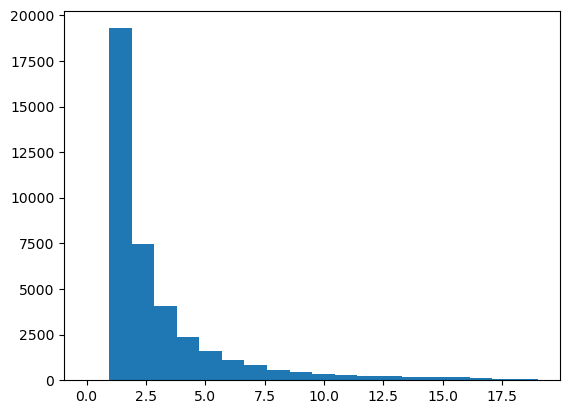

In [52]:
#way too many values to graph all of them, so just doing the first few
import matplotlib.pyplot as plt
count = 20
plt.hist(list(range(count)), bins=count, weights=nx.degree_histogram(feb_graph)[0:count])
plt.show()

(array([   0., 6895., 1941.,  856.,  500.,  324.,  215.,  165.,  112.,
         128.,  104.,   93.,   53.,   57.,   63.,   52.,   38.,   41.,
          40.,   33.]),
 array([ 0.  ,  0.95,  1.9 ,  2.85,  3.8 ,  4.75,  5.7 ,  6.65,  7.6 ,
         8.55,  9.5 , 10.45, 11.4 , 12.35, 13.3 , 14.25, 15.2 , 16.15,
        17.1 , 18.05, 19.  ]),
 <BarContainer object of 20 artists>)

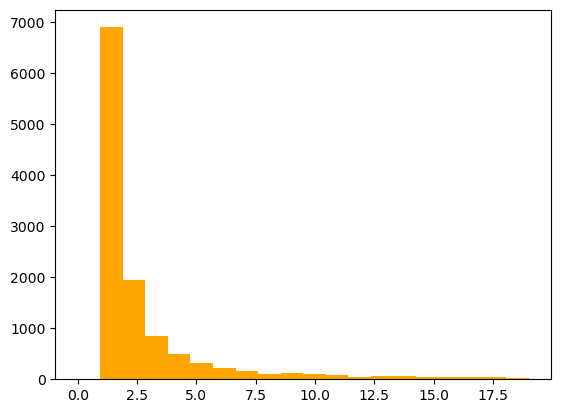

In [53]:
plt.hist(list(range(count)), bins=count, weights=nx.degree_histogram(april_graph)[0:count], color='orange')

In [54]:
#both seem to follow power law. Though it didn't take into account weight
feb_weight_degree = list(dict(nx.degree(feb_graph, weight='percent_visiting')).values())
april_weight_degree = list(dict(nx.degree(april_graph, weight='percent_visiting')).values())

In [55]:
#wanted to check a few degrees
feb_weight_degree[2017:2022]

[0.004178389753784345,
 1.4366808364803556,
 0.0014411349319544417,
 0.001343183344526528,
 0.026275872954964707]

(array([4.1321e+04, 4.3100e+02, 3.0260e+03, 1.2580e+03, 2.3300e+02,
        4.1000e+01, 6.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([4.89757937e-05, 5.67178430e-01, 1.13430788e+00, 1.70143734e+00,
        2.26856679e+00, 2.83569625e+00, 3.40282570e+00, 3.96995515e+00,
        4.53708461e+00, 5.10421406e+00, 5.67134352e+00]),
 <BarContainer object of 10 artists>)

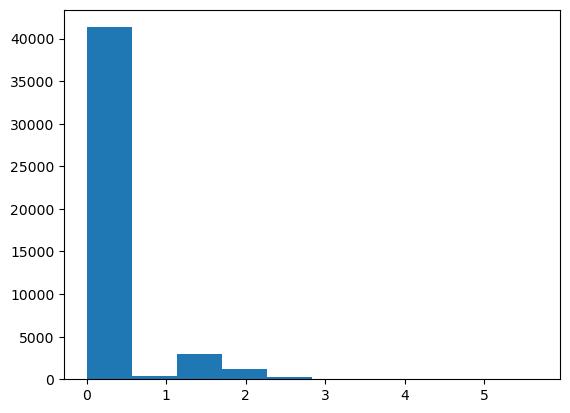

In [56]:
plt.hist(feb_weight_degree)

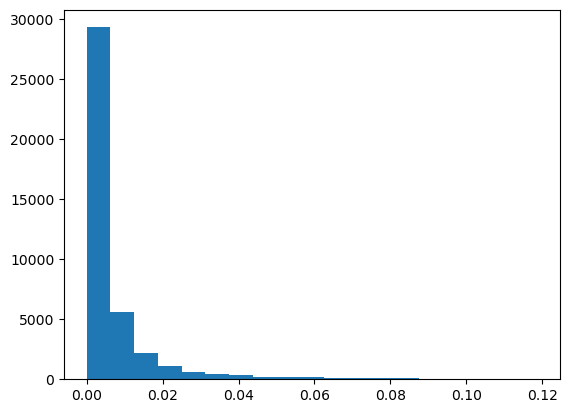

In [57]:
#wonder about the distribution of the first few
import matplotlib.pyplot as plt
plt.hist(feb_weight_degree, bins=[x/160 for x in range(20)])
plt.show()

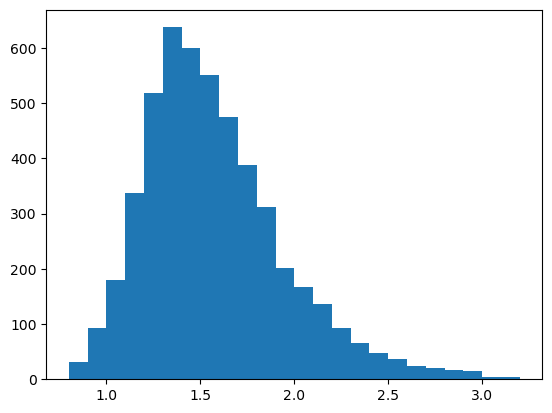

In [58]:
#so have a power law here
#looking at that second bump now
import matplotlib.pyplot as plt
plt.hist(feb_weight_degree, bins=[0.8+x/10 for x in range(25)])
plt.show()

In [59]:
#interesting, another curve

(array([1.2103e+04, 2.0200e+02, 2.5120e+03, 1.8050e+03, 4.0500e+02,
        6.1000e+01, 1.3000e+01, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.66910077e-04, 5.44241634e-01, 1.08831636e+00, 1.63239108e+00,
        2.17646581e+00, 2.72054053e+00, 3.26461525e+00, 3.80868998e+00,
        4.35276470e+00, 4.89683942e+00, 5.44091415e+00]),
 <BarContainer object of 10 artists>)

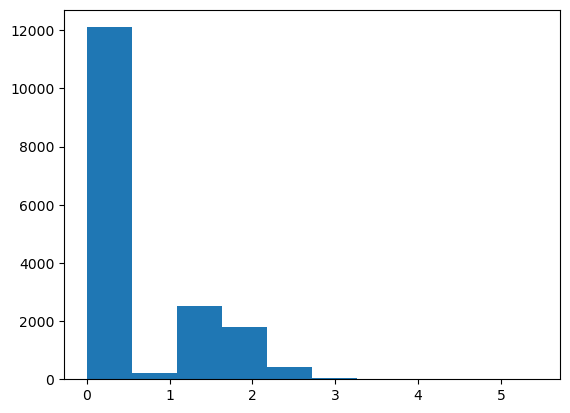

In [60]:
#now looking at april
plt.hist(april_weight_degree)

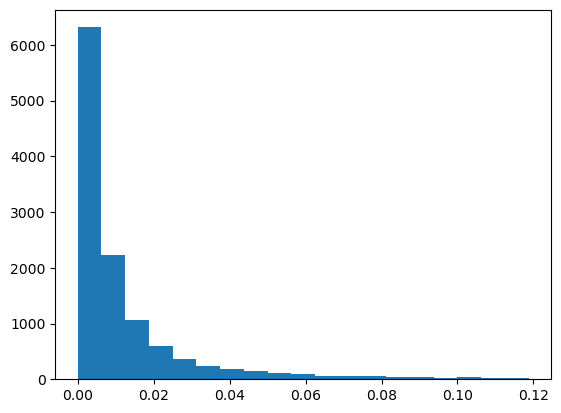

In [61]:
#larger second bump
#going to look at that first value though
import matplotlib.pyplot as plt
plt.hist(april_weight_degree, bins=[x/160 for x in range(20)])
plt.show()

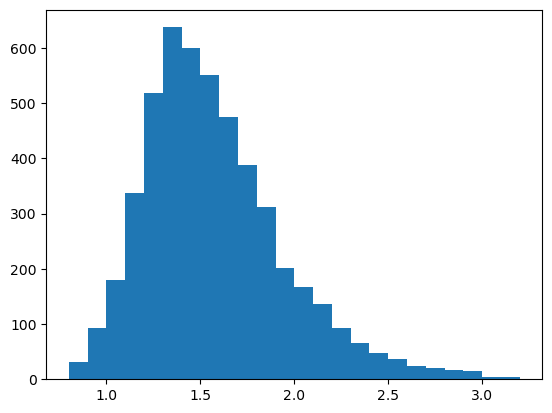

In [62]:
#still does follow the power law
#looking at that second bump now
import matplotlib.pyplot as plt
plt.hist(feb_weight_degree, bins=[0.8+x/10 for x in range(25)])
plt.show()

In [63]:
#again, a curve

In [64]:
len(nx.dominating_set(feb_graph))

38668

In [65]:
len(nx.dominating_set(feb_graph))/len(feb_graph)

0.8348194045640018

In [66]:
len(nx.dominating_set(april_graph))

11442

In [67]:
len(nx.dominating_set(april_graph))/len(april_graph)

0.6689663236669785

## calculated metrics
The graph has a very low density in both times, though the density increased by 3x in April. This may be linked to the decrease in nodes by about 1/3 from February to April.

In both months the degree follows a power law rule for the smaller edges, then there is an increase centered around 1, after which it follows another curve downwards.

In February you'd need a set of 83% of the blocks in order to have visitors to every other block, while in April you'd only need 67% of the blocks. This indicates that the nodes in April are generally more connected.

## Bonus Task 1.
Run the Louvain algorithm on these two networks using the networkx function `louvain_communities()` to detect sub-communities among census block groups (CBG) in MA. Discuss the racial and income profile of different “communities” identified by Louvain using ACS’s CBG-based demographic estimates. What changed during COVID? Any other pattern you have noticed? Another interesting thing to see about these communities is to plot them on the map and see how they are distributed in space. Do they tend to cluster with each other geographically? Speculate on why or why not. [one extra point] 

In [68]:
#already loaded acs_data earlier, going to reset the earlier mobility info though
april_mobility['poi_cbg'] = april_mobility['poi_cbg'].astype(str)
april_mobility['visitor_census_tract'] = april_mobility['visitor_census_tract'].astype(str)
feb_mobility['poi_cbg'] = feb_mobility['poi_cbg'].astype(str)
feb_mobility['visitor_census_tract'] = feb_mobility['visitor_census_tract'].astype(str)
acs_data['census_block_group'] = acs_data['census_block_group'].astype(str)

In [69]:
feb_mobility_info = pd.merge(acs_data, feb_mobility, left_on='census_block_group', right_on='poi_cbg', how='right')
april_mobility_info = pd.merge(acs_data, april_mobility, left_on='census_block_group', right_on='poi_cbg', how='right')

In [70]:
april_mobility_info.head()

,census_block_group,total_population,black_population,white_population,asian_population,hispanic_population,median_income,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count,percent_visiting
0,250010135001,2341,1,2324,0,0,108732.0,250010135001,2020_4,417,250010135001,120,0.287770
1,250010135001,2341,1,2324,0,0,108732.0,250010135001,2020_4,417,250010136001,31,0.074341
2,250010135001,2341,1,2324,0,0,108732.0,250010135001,2020_4,417,250010134003,16,0.038369
3,250010135001,2341,1,2324,0,0,108732.0,250010135001,2020_4,417,250010135004,13,0.031175
4,250010135001,2341,1,2324,0,0,108732.0,250010135001,2020_4,417,250010135002,10,0.023981


In [71]:
april_mobility_info.isna().sum()

census_block_group          0
total_population            0
black_population            0
white_population            0
asian_population            0
hispanic_population         0
median_income           13562
poi_cbg                     0
year_month                  0
raw_device_counts           0
visitor_census_tract        0
visitor_count               0
percent_visiting            0
dtype: int64

In [72]:
len(april_graph)

17104

In [73]:
#going to restrict the data to just Mass data
april_mobility_info = april_mobility_info.query("poi_cbg.str.startswith('25') & visitor_census_tract.str.startswith('25')")

In [74]:
april_graph = nx.from_pandas_edgelist(april_mobility_info, source='poi_cbg', target='visitor_census_tract', edge_attr='percent_visiting', create_using=nx.DiGraph)

In [75]:
len(april_graph)

4985

In [76]:
#setting a seed, so can make data claims without having it change the next run
april_louvain = nx.algorithms.community.louvain_communities(april_graph, seed=20221019)

In [77]:
print(type(april_louvain))
print(len(april_louvain))

<class 'list'>
17


In [78]:
len(april_louvain[0])

292

In [79]:
#seems reasonable
april_louvain[0]

{'250173201022',
 '250173201023',
 '250173201031',
 '250173201041',
 '250173201042',
 '250173201043',
 '250173211001',
 '250173211002',
 '250173211003',
 '250173212001',
 '250173212002',
 '250173212003',
 '250173213001',
 '250173213002',
 '250173213003',
 '250173213004',
 '250173213005',
 '250173213006',
 '250173215001',
 '250173215002',
 '250173215003',
 '250173216001',
 '250173216002',
 '250173216003',
 '250173216004',
 '250173222001',
 '250173652011',
 '250173652012',
 '250173652021',
 '250173652022',
 '250173652023',
 '250173661001',
 '250173661002',
 '250173661003',
 '250173661004',
 '250173661005',
 '250173662011',
 '250173662012',
 '250173662021',
 '250173662022',
 '250173662023',
 '250173671001',
 '250173671002',
 '250173671003',
 '250173671004',
 '250173672001',
 '250173672002',
 '250173672003',
 '250173672004',
 '250173672005',
 '250173672006',
 '250173672007',
 '250173743003',
 '250173748003',
 '250173821001',
 '250173821002',
 '250173821003',
 '250173821004',
 '250173821005

In [80]:
april_mobility_info[april_mobility_info['poi_cbg'].isin(april_louvain[0])].describe()

,total_population,black_population,white_population,asian_population,hispanic_population,median_income,raw_device_counts,visitor_count,percent_visiting
count,19819.000000,19819.000000,19819.000000,19819.000000,19819.000000,19743.000000,19819.000000,19819.000000,19819.000000
mean,1751.300822,50.780514,1477.345577,2.821888,8.739543,110705.396850,1109.743428,8.233160,0.011864
std,744.109472,85.965813,679.173742,12.207687,20.127402,47756.500864,923.064363,22.738077,0.029142
min,556.000000,0.000000,226.000000,0.000000,0.000000,19004.000000,103.000000,4.000000,0.000822
25%,1162.000000,0.000000,953.000000,0.000000,0.000000,75833.000000,469.000000,4.000000,0.003663
50%,1605.000000,20.000000,1326.000000,0.000000,0.000000,103867.000000,812.000000,4.000000,0.006126
75%,2161.000000,60.000000,1876.000000,0.000000,7.000000,139655.000000,1414.000000,5.000000,0.010959
max,4256.000000,678.000000,3727.000000,84.000000,134.000000,250001.000000,4866.000000,982.000000,0.460595


In [81]:
for i in range(len(april_louvain)):
    febList = feb_mobility_info[feb_mobility_info['poi_cbg'].isin(april_louvain[i])]
    aprilList = april_mobility_info[april_mobility_info['poi_cbg'].isin(april_louvain[i])]
    if febList['total_population'].mean() == 0 or aprilList['total_population'].mean() == 0:
        continue #theres a few census_block_groups that don't have any pop info
    print(str(i).zfill(2), 'feb',
          round(febList['black_population'].mean()/febList['total_population'].mean(), 6), 'april',
          round(aprilList['black_population'].mean()/aprilList['total_population'].mean(), 6))

00 feb 0.032075 april 0.028996
01 feb 0.041039 april 0.039704
02 feb 0.075831 april 0.077385
03 feb 0.035488 april 0.034482
04 feb 0.055772 april 0.065676
05 feb 0.032092 april 0.028675
06 feb 0.02656 april 0.026825
07 feb 0.037953 april 0.039749
08 feb 0.101997 april 0.113783
09 feb 0.093661 april 0.097899
10 feb 0.189772 april 0.284205
11 feb 0.035836 april 0.036452
12 feb 0.027849 april 0.026982
13 feb 0.061187 april 0.063296
14 feb 0.033164 april 0.031453
15 feb 0.045974 april 0.043282


In [84]:
#so group 10 has about 10x the amount of black people than the other groups, and went from 18% to 28% in 2 months
for i in range(len(april_louvain)):
    febList = feb_mobility_info[feb_mobility_info['poi_cbg'].isin(april_louvain[i])]
    aprilList = april_mobility_info[april_mobility_info['poi_cbg'].isin(april_louvain[i])]
    if febList['total_population'].mean() == 0 or aprilList['total_population'].mean() == 0:
        continue #theres a few census_block_groups that don't have any pop info
    print(str(i).zfill(2), 'feb',
          round(febList['hispanic_population'].mean()/febList['total_population'].mean(), 6), 'april',
          round(aprilList['hispanic_population'].mean()/aprilList['total_population'].mean(), 6))

00 feb 0.004948 april 0.00499
01 feb 0.002756 april 0.003088
02 feb 0.004697 april 0.004831
03 feb 0.004014 april 0.003953
04 feb 0.003248 april 0.005589
05 feb 0.003687 april 0.003421
06 feb 0.003047 april 0.003033
07 feb 0.004208 april 0.004225
08 feb 0.003845 april 0.00447
09 feb 0.006258 april 0.005926
10 feb 0.007562 april 0.007859
11 feb 0.004862 april 0.005625
12 feb 0.004275 april 0.003184
13 feb 0.005221 april 0.005598
14 feb 0.007479 april 0.007269
15 feb 0.005051 april 0.004031


In [85]:
#and no group has a significantly larger amount of hispanic people
for i in range(len(april_louvain)):
    febList = feb_mobility_info[feb_mobility_info['visitor_census_tract'].isin(april_louvain[i])]
    febPop = feb_mobility_info[feb_mobility_info['poi_cbg'].isin(april_louvain[i])]['total_population'].mean()
    aprilList = april_mobility_info[april_mobility_info['visitor_census_tract'].isin(april_louvain[i])]
    aprilPop = april_mobility_info[april_mobility_info['poi_cbg'].isin(april_louvain[i])]['total_population'].mean()
    if febList['total_population'].mean() == 0 or aprilList['total_population'].mean() == 0:
        continue #theres a few census_block_groups that don't have any pop info
    print(str(i).zfill(2), 'feb',
          round(febList['visitor_count'].sum()/febPop, 6), 'april',
          round(aprilList['visitor_count'].sum()/aprilPop, 6), 'ratio',
          round((febList['visitor_count'].sum()/febPop)/(aprilList['visitor_count'].sum()/aprilPop), 6))

00 feb 229.667541 april 95.969235 ratio 2.393137
01 feb 218.426196 april 101.224545 ratio 2.157838
02 feb 353.306302 april 189.451026 ratio 1.864895
03 feb 176.327939 april 81.63678 ratio 2.159908
04 feb 5.849522 april 3.214968 ratio 1.819465
05 feb 220.587999 april 119.481812 ratio 1.846206
06 feb 185.245571 april 89.913027 ratio 2.060275
07 feb 240.102286 april 105.486569 ratio 2.276141
08 feb 364.998093 april 175.369148 ratio 2.081313
09 feb 349.243015 april 131.388488 ratio 2.658094
10 feb 317.301138 april 137.001387 ratio 2.316043
11 feb 292.591251 april 130.725553 ratio 2.23821
12 feb 69.865686 april 40.199619 ratio 1.737969
13 feb 314.033503 april 152.031771 ratio 2.065578
14 feb 221.182255 april 116.338599 ratio 1.901194
15 feb 159.147398 april 59.973329 ratio 2.653636


In [86]:
#the ratio of visitors/pop decreased a lot. Started highest in 08.

In [87]:
for i in range(len(april_louvain)):
    febList = feb_mobility_info[feb_mobility_info['poi_cbg'].isin(april_louvain[i])]
    aprilList = april_mobility_info[april_mobility_info['poi_cbg'].isin(april_louvain[i])]
    if febList['total_population'].mean() == 0 or aprilList['total_population'].mean() == 0:
        continue #theres a few census_block_groups that don't have any pop info
    print(str(i).zfill(2), 'feb',
          round(febList['median_income'].mean(), 6), 'april',
          round(aprilList['median_income'].mean(), 6))

00 feb 111643.026433 april 110705.39685
01 feb 82957.958149 april 82647.8254
02 feb 52896.838184 april 53634.157068
03 feb 79910.969363 april 79348.074914
04 feb 84995.549367 april 85813.543478
05 feb 68649.705836 april 69557.414145
06 feb 87892.598529 april 83433.921049
07 feb 92630.594484 april 92476.23281
08 feb 81560.324146 april 79964.241529
09 feb 78478.601953 april 70713.838922
10 feb 78518.200787 april 68885.36147
11 feb 79392.173216 april 79397.413176
12 feb 57704.775112 april 54149.036287
13 feb 69656.761025 april 69320.749938
14 feb 53837.320311 april 53590.709727
15 feb 98555.494506 april 99357.288982


In [88]:
#group 0 has the most income, more than double the least (group 14)
#groups stayed about the same in income, except 10

In [89]:
for i in range(len(april_louvain)):
    feb_mobility_info.loc[feb_mobility_info['poi_cbg'].isin(april_louvain[i]), 'from_louvain'] = i
    feb_mobility_info.loc[feb_mobility_info['visitor_census_tract'].isin(april_louvain[i]), 'to_louvain'] = i
    april_mobility_info.loc[april_mobility_info['poi_cbg'].isin(april_louvain[i]), 'from_louvain'] = i
    april_mobility_info.loc[april_mobility_info['visitor_census_tract'].isin(april_louvain[i]), 'to_louvain'] = i

In [90]:
feb_mobility_info.head()

,census_block_group,total_population,black_population,white_population,asian_population,hispanic_population,median_income,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count,percent_visiting,from_louvain,to_louvain
0,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056551003,95,0.067857,14.0,14.0
1,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056551002,65,0.046429,14.0,14.0
2,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056554001,40,0.028571,14.0,14.0
3,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056516002,38,0.027143,14.0,14.0
4,250056551003,458,0,405,0,0,71341.0,250056551003,2020_2,1400,250056551001,38,0.027143,14.0,14.0


In [91]:
feb_mobility_info.isna().sum()

census_block_group           0
total_population             0
black_population             0
white_population             0
asian_population             0
hispanic_population          0
median_income            41854
poi_cbg                      0
year_month                   0
raw_device_counts            0
visitor_census_tract         0
visitor_count                0
percent_visiting             0
from_louvain                 0
to_louvain              193773
dtype: int64

In [92]:
import geopandas as gpd
geo_block = gpd.read_file('census_block_MA.geojson')

In [93]:
geo_block.head()

,state_fips,state,census_block_group,geometry
0,25,MA,250277304011,"MULTIPOLYGON (((-71.78563 42.30372, -71.78547 ..."
1,25,MA,250277304014,"MULTIPOLYGON (((-71.77701 42.30069, -71.77698 ..."
2,25,MA,250214223022,"MULTIPOLYGON (((-70.94656 42.18471, -70.94641 ..."
3,25,MA,250092031005,"MULTIPOLYGON (((-70.88603 42.48529, -70.88580 ..."
4,25,MA,250092172024,"MULTIPOLYGON (((-70.91214 42.54773, -70.91190 ..."


In [94]:
print(geo_block['state_fips'].value_counts())
print(geo_block['state'].value_counts())

25    4985
Name: state_fips, dtype: int64
MA    4985
Name: state, dtype: int64


In [95]:
#lets just drop those two columns that give no info
geo_block.drop(['state_fips', 'state'], axis=1, inplace=True)

In [96]:
geo_block.dtypes

census_block_group      object
geometry              geometry
dtype: object

In [97]:
feb_geo = geo_block.merge(feb_mobility_info, on='census_block_group')

In [98]:
feb_geo.head()

,census_block_group,geometry,total_population,black_population,white_population,asian_population,hispanic_population,median_income,poi_cbg,year_month,raw_device_counts,visitor_census_tract,visitor_count,percent_visiting,from_louvain,to_louvain
0,250277304011,"MULTIPOLYGON (((-71.78563 42.30372, -71.78547 ...",900,157,743,0,0,62232.0,250277304011,2020_2,776,250277304011,47,0.060567,13.0,13.0
1,250277304011,"MULTIPOLYGON (((-71.78563 42.30372, -71.78547 ...",900,157,743,0,0,62232.0,250277304011,2020_2,776,250277304013,40,0.051546,13.0,13.0
2,250277304011,"MULTIPOLYGON (((-71.78563 42.30372, -71.78547 ...",900,157,743,0,0,62232.0,250277304011,2020_2,776,250277320011,21,0.027062,13.0,13.0
3,250277304011,"MULTIPOLYGON (((-71.78563 42.30372, -71.78547 ...",900,157,743,0,0,62232.0,250277304011,2020_2,776,250277304014,18,0.023196,13.0,13.0
4,250277304011,"MULTIPOLYGON (((-71.78563 42.30372, -71.78547 ...",900,157,743,0,0,62232.0,250277304011,2020_2,776,250277320022,14,0.018041,13.0,13.0


In [99]:
feb_geo.rename({'geometry':'from_geometry'}, axis=1, inplace=True)

In [ ]:
feb_geo.head()

In [ ]:
feb_geo['visitor_census_tract'] = feb_geo['visitor_census_tract'].astype(str)

In [ ]:
#lets also include the geodata for the location its going to
#the drop is so that we don't include two census_block_groups
feb_geo = geo_block[['census_block_group', 'geometry']].merge(
    feb_geo.drop('census_block_group', axis=1), left_on='census_block_group', right_on='visitor_census_tract')

In [ ]:
feb_geo.head()

In [ ]:
#now doing the same for april
april_geo = geo_block.merge(april_mobility_info, on='census_block_group')
april_geo.rename({'geometry':'from_geometry'}, axis=1, inplace=True)
april_geo = geo_block[['census_block_group', 'geometry']].merge(
    april_geo.drop('census_block_group', axis=1), left_on='census_block_group', right_on='visitor_census_tract')

In [ ]:
feb_geo_by_source = feb_geo.groupby('census_block_group').agg({'from_louvain':'min'}).reset_index()

In [ ]:
feb_geo_by_source.head()

In [ ]:
feb_geo_by_source = geo_block.merge(feb_geo_by_source, on='census_block_group')

In [ ]:
feb_geo_by_source.head()

In [ ]:
feb_geo_by_source.query('from_louvain == 4')

In [ ]:
feb_geo_by_source.query('from_louvain == 2')

In [ ]:
import folium
#Boston general coords
clon = -71.7
clat = 42.3
m = folium.Map(location=(clat, clon), zoom_start=8, width=800, height=400, tiles="Cartodb Positron")

folium.Choropleth(
    geo_data=feb_geo_by_source,
    name="choropleth",
    data=feb_geo_by_source,
    columns= ["census_block_group", "from_louvain"],
    key_on="feature.properties.census_block_group",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=9,
    legend_name="Visitors to these blocks, Boston, 2020").add_to(m)

display(m)

The groups do appear to be geographically distributed, with group 3 and 4 being mostly in Western Mass, and group 10 being mostly in Boston.

In [ ]:
len(feb_geo)

In [ ]:
#way too many rows to graph all, so did random sample
for row in feb_geo.sample(4000).iloc:
    sourcePoint = row['from_geometry'].centroid
    destPoint = row['geometry'].centroid
    if row['from_louvain'] != row['to_louvain']:
        color = 'blue'
    else:
        color = 'red'
    folium.PolyLine([(sourcePoint.y, sourcePoint.x), (destPoint.y, destPoint.x)], weight=4, opacity=max(0.02, row['visitor_count']/300), color=color).add_to(m)

In [ ]:
#doing the same for April
ap_map = folium.Map(location=(clat, clon), zoom_start=8, width=800, height=400, tiles="Cartodb Positron")

folium.Choropleth(
    geo_data=feb_geo_by_source,
    name="choropleth",
    data=feb_geo_by_source,
    columns= ["census_block_group", "from_louvain"],
    key_on="feature.properties.census_block_group",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    bins=9,
    legend_name="Visitors to these blocks, Boston, 2020").add_to(ap_map)

#way too many rows to graph all, so did random sample
for row in april_geo.sample(4000).iloc:
    sourcePoint = row['from_geometry'].centroid
    destPoint = row['geometry'].centroid
    if row['from_louvain'] != row['to_louvain']:
        color = 'blue'
    else:
        color = 'red'
    folium.PolyLine([(sourcePoint.y, sourcePoint.x), (destPoint.y, destPoint.x)], weight=4, opacity=max(0.02, row['visitor_count']/300), color=color).add_to(ap_map)

In [ ]:
#now displaying both side by side
display(m)

In [ ]:
display(ap_map)

## conclusions for the bonus
The racial profile of group 10 (parts of Boston) changed drastically during the pandemic, going from 18% to 28% black people.

The proportion of visitors to population decreased by about 2x in all groups.

The groups do appear to be geographically distributed, with group 3 and 4 being mostly in Western Mass, and group 10 being mostly in Boston.

February and April look about the same in terms of how often people moved between groups.